# Kagome Model

In [1]:
import numpy as np

In [2]:
# Bravais Vectors
a1=np.array([2,0])
a2=np.array([1,np.sqrt(3)])
# Basis Vectors
a1_b=a1/2
a2_b=a2/2
# Reciprocal Vectors
b1x = (2*np.pi/(a1[0]*a2[1]-a1[1]*a2[0])) * a2[1]
b1y = (2*np.pi/(a1[0]*a2[1]-a1[1]*a2[0])) * -a2[0]
b2x = (2*np.pi/(a1[0]*a2[1]-a1[1]*a2[0])) * -a1[1]
b2y = (2*np.pi/(a1[0]*a2[1]-a1[1]*a2[0])) * a1[0]
b1=np.array([b1x,b1y]) 
b2=np.array([b2x,b2y]) 

print(f'b1={b1}, |b1|={np.linalg.norm(b1)}')
print(f'b1={b2}, |b2|={np.linalg.norm(b2)}')

print( (a1[0]*a2[1]-a1[1]*a2[0]) * (b1[0]*b2[1]-b1[1]*b2[0]) / np.pi/np.pi ) 

b1=[ 3.14159265 -1.81379936], |b1|=3.6275987284684357
b1=[0.         3.62759873], |b2|=3.6275987284684357
3.9999999999999996


In [3]:
# Hopping Parameters
# t1=t2=-1;L1=L2=0
# t1=-1;L1=0;t2=0;L2=0 # NN
t1=-1;L1=1;t2=0;L2=0 # Complex NN (Well-Defined Berry Curvature)
# t1=0;L1=0;t2=-1;L2=-1 # Complex NNN
# t1=-1;L1=0.28;t2=0.3;L2=0.2 # Complex NNN (Well-Defined Berry Curvature)
# Kagome Matrix
def Hamiltonian(kx,ky):
    k1=np.dot([kx,ky],a1_b);k2=np.dot([kx,ky],a2_b);k3=k2-k1 # Convention
    H = 2*t1*np.array([
    [0, np.cos(k1), np.cos(k2)],
    [np.cos(k1), 0, np.cos(k3)],        
    [np.cos(k2), np.cos(k3), 0]
    ])+2*1j*L1*np.array([
    [0, np.cos(k1), -np.cos(k2)],
    [-np.cos(k1), 0, np.cos(k3)],        
    [np.cos(k2), -np.cos(k3), 0]
    ])+2*t2*np.array([
    [0, np.cos(k2+k3), np.cos(k3-k1)],
    [np.cos(k2+k3), 0, np.cos(k1+k2)],
    [np.cos(k3-k1), np.cos(k1+k2), 0]
    ])+2*1j*L2*np.array([
    [0, -np.cos(k2+k3), np.cos(k3-k1)],
    [np.cos(k2+k3), 0, -np.cos(k1+k2)],
    [-np.cos(k3-k1), np.cos(k1+k2), 0]
    ])
    return H

In [4]:
# Discretizing Brillioun Zone
N1 = N2 = 48
# Following process of discretization leads to dejeneracy that we don't want it !
# q1_list = np.arange(-N1//2,N1//2) / N1
# q2_list =  np.arange(-N2//2,N2//2) / N2
# FBZ is Now Bigger 4 Times:
q1_list = np.linspace(-N1,N1,N1,endpoint=False) / N1 
q2_list = np.linspace(-N2,N2,N2,endpoint=False) / N2
# Allowed k Pairs
Q = np.zeros([N1,N2,2])
for iq1, q1 in enumerate(q1_list):
    for iq2, q2 in enumerate(q2_list):
        Q[iq1,iq2,:] = q1*b1+q2*b2
# The Some k-Points for N1=N2=6 moved into FBZ:
# Q[0,5]=Q[0,5]+b1
# Q[0,4]=Q[0,4]+b1
# Q[4,0]=Q[4,0]+b2
# Q[5,0]=Q[5,0]+b2

In [6]:
# Eigenvalues and Eigenenergies of Matrix
q = (Hamiltonian(1,1).shape)[0] # Dimension of Matrix
EEA=np.empty([N1,N2,q])
UUA=np.empty([N1,N2,q,q],dtype=complex)
for iq1, q1 in enumerate(q1_list):
    for iq2, q2 in enumerate(q2_list):
        kx,ky=Q[iq1,iq2,:]
        EEA[iq1,iq2,:],UUA[iq1,iq2,:,:] = np.linalg.eigh(Hamiltonian(kx,ky))
kx,ky=Q[0,1,:] # Bu çifte karşılık gelen k bileşenleri
print(kx,ky)

-3.141592653589793 -1.6626494172146997


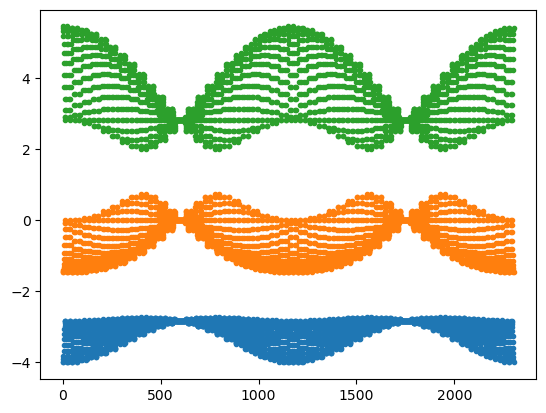

In [7]:
# Plot Energy Bands
import matplotlib.pyplot as plt
for i in range(3):
        plt.plot(EEA[:,:,i].flatten(),'.') 

In [8]:
# Diklik Bağıntısı
np.dot(np.conj(UUA[1,0,:,1]),UUA[1,0,:,1])

(0.9999999999999996+0j)

In [9]:
for bi in range(q): 
    # Caculate The Link Variables
    bj = bi # Band index  
    U1=np.zeros([N1,N2],dtype=complex)
    U2=np.zeros([N1,N2],dtype=complex)
    for iq1, q1 in enumerate(q1_list): # Orginal q1_list
        for iq2, q2 in enumerate(q2_list): # Orginal q2_list
            s1=np.dot(np.conj(UUA[iq1,iq2,:,bi]),UUA[np.mod(iq1+1,N1),iq2,:,bj]) 
            s2=np.dot(np.conj(UUA[iq1,iq2,:,bj]),UUA[iq1,np.mod(iq2+1,N2),:,bi]) 
            U1[iq1,iq2]=s1/np.abs(s1)
            U2[iq1,iq2]=s2/np.abs(s2)
    # Calculate The Field Strength
    F12=np.zeros([N1,N2],dtype=complex) 
    for iq1, q1 in enumerate(q1_list):
        for iq2, q2 in enumerate(q2_list):
            F12[iq1,iq2] = U1[iq1,iq2]*U2[np.mod(iq1+1,N1),iq2]/(U1[iq1,np.mod(iq2+1,N2)]*U2[iq1,iq2])
            F12[iq1,iq2] = np.log(F12[iq1,iq2])
    # Alternative F12 Calculation 
    # F12=np.log( U1*np.roll(U2,-1,axis=0)*np.conj(np.roll(U1,-1,axis=1)*U2) )
    # Chern Number of Band Index
    print("Band Index:",bi)
    print(F12.sum()/(2j*np.pi))

Band Index: 0
(4+2.1193255801311987e-15j)
Band Index: 1
(1.7669748230352872e-16+8.969714507744642e-16j)
Band Index: 2
(-4+3.438092036892168e-16j)
